##  Data Science in Python - Assignment_1

### Student Details :  
Name - Sumit Chawan - 18200549  
Name - Mohammad Ali Mirza - 18200197


## Data Pre-processing & Visualizations on Aircraft Crashes

## Importing required packages

In [1]:
import requests
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import json
from sklearn.preprocessing import MinMaxScaler

## Constants

In [2]:
#Url to download first 50000 records since max limit is 50000 
#The data is ordered before fetching the data using the order param
url="https://opendata.socrata.com/resource/9r8b-gr46.json?$order=:id&$limit=50000"
#Url to download next 10000 records
url2="https://opendata.socrata.com/resource/9r8b-gr46.json?$order=:id&$limit=10000&$offset=50000"
#Name of CSV file that will be stored locally 
file_name ="faa_wild_life.csv"
# Error Message if there is error
internet_error = "There is no Internet Connection! Please try again"
#Constant to replace for unknown values
val_unknown = "UNKNOWN"
# Constant for top results
top =10

## Function to get data from Url

In [3]:
# @param url:- Url form which data needs to be fetched
def getData(url):
    response = requests.get(url)
    # Checking response code from server
    if response.status_code == requests.codes.ok:
        return (True,pd.read_json(response.content))
    return (False,'')

## Function returning normalize array

In [4]:
# @param data_array = pandas.series to be normalized
def normalize_data(data_array):
    scaler = MinMaxScaler(feature_range=(1,100))
    normalized_data= scaler.fit_transform(data_array.values.reshape(-1, 1))
    return normalized_data

## Get the raw data using API

In [5]:
#Check whether file is already downloaded
if not os.path.isfile(file_name):
    print("Fetching file through API")
    data1 = getData(url)
    if(data1[0]):
        data2 = getData(url2)
        if(data2[0]):
            df = data1[1].append(data2[1])
            df.to_csv(file_name,index=False)
            print("File downloaded sucessfully!")
        else:
            print(internet_error) 
    else:
        print(internet_error)

Fetching file through API
File downloaded sucessfully!


## Reading Data from File

In [6]:
data = pd.read_csv(file_name)

## Parameters in the dataset

In [7]:
data.columns

Index(['aircraft_type', 'airport', 'birds_seen', 'birds_struck', 'city',
       'cost_of_repairs', 'date', 'height_feet', 'operator', 'operator_id',
       'other_costs', 'phase_of_flight', 'precipitation',
       'registration_number', 'runway', 'size', 'sky', 'species', 'speed',
       'state'],
      dtype='object')

## Parameters Explained

1) aircraft_type = Type of aircraft.  
2) airport = airport code.  
3) birds_seen = No. of birds seen before crash.  
4) birds_struck = No. of birds that strucked the aircraft.  
5) city = The city when aircraft departed.  
6) cost_of_repairs = The cost incurred after a crash.  
7) date = The formal date of crash.  
8) height_feet = The Height from the ground.  
9) operator = The airline operator.  
10) operator_id = The airline operator.  
11) other_costs = other costs associated pertaining to a crash.  
12) phase_of_flight = The phase of flight like parked, landing etc.  
13) precipitation = Precipitation of the sky at time of crash.  
14) registration_number = File registeration number.  
15) runway = The runway number.  
16) size =  The size of bird which struck the aircraft.  
17) sky = The sky state during the crash.  
18) species = The bird species that struck the aircraft.  
19) speed = The speed of the flight.  
20) state = The state in which flight crashed.

## Data Pre-Processing

In [8]:
##Data Type Counts
data.dtypes.value_counts()

object     16
float64     4
dtype: int64

In [9]:
#Converting Date object to Date_Time datatype
data['date'] = pd.to_datetime(data['date']) 
#Data Type Counts after conversion to data_time datatype
data.dtypes.value_counts()

object            15
float64            4
datetime64[ns]     1
dtype: int64

### Handling Missing Values

In [10]:
#Get the Missing Count Values for each column
data.isnull().sum()

aircraft_type              0
airport                    0
birds_seen             38219
birds_struck             195
city                       0
cost_of_repairs        58255
date                       0
height_feet            24892
operator                   0
operator_id                0
other_costs            59158
phase_of_flight        19876
precipitation          30589
registration_number    18923
runway                 15993
size                   18360
sky                    29343
species                    0
speed                  36894
state                   8611
dtype: int64

### Replacing empty values with appropriate values

In [11]:
#Replacing with UNKNOWN
col_list = list(data.columns)
col_list.remove('height_feet')
col_list.remove('speed')
data.loc[:,col_list] = data.loc[:,col_list].replace(np.NaN,val_unknown).bfill().ffill()
#Checking whether all null values are replaced or not except height and speed
data.isnull().sum()

aircraft_type              0
airport                    0
birds_seen                 0
birds_struck               0
city                       0
cost_of_repairs            0
date                       0
height_feet            24892
operator                   0
operator_id                0
other_costs                0
phase_of_flight            0
precipitation              0
registration_number        0
runway                     0
size                       0
sky                        0
species                    0
speed                  36894
state                      0
dtype: int64

## Handling sky value which has repeated values

In [12]:
#Showing unique sky values
list(np.unique(data['sky']))

['NO Cloud', 'No Cloud', 'Overcast', 'Some Cloud', 'UNKNOWN']

In [13]:
#Replacing NO Cloud with No Cloud
data['sky'] = data['sky'].replace('NO Cloud','No Cloud').bfill().ffill()

### Formating range of bird_seen

In [14]:
#Getting unique Bird seen range
print("Unique Bird seen range",np.unique(data['birds_seen']))
#Forming a new range 1-10 instead of 1,2 and 2-10
data.loc[(data['birds_seen']=='1') | (data['birds_seen']=='4') | (data['birds_seen']=='2-10') ,'birds_seen'] = '1-10'
print("------------------------------------------")
#Checking the range was repleced or not
print("New range of bird seen",np.unique(data['birds_seen']))

Unique Bird seen range ['0' '1' '11-100' '2-10' '4' 'Over 100' 'UNKNOWN']
------------------------------------------
New range of bird seen ['0' '1-10' '11-100' 'Over 100' 'UNKNOWN']


### Formating range of bird_struck

In [15]:
#Getting unique Bird Struck range
print("Unique Bird Struck range",np.unique(data['birds_struck']))
#Forming a new range 1-10 instead of 1 and 2-10
data.loc[(data['birds_struck']=='1') | (data['birds_struck']=='2-10') ,'birds_struck'] = '1-10'
print("------------------------------------------")
#Checking the range was repleced or not
print("New range of bird struck",np.unique(data['birds_struck']))

Unique Bird Struck range ['0' '1' '11-100' '2-10' 'Over 100' 'UNKNOWN']
------------------------------------------
New range of bird struck ['0' '1-10' '11-100' 'Over 100' 'UNKNOWN']


### Handling improper value of speed during parked phase

In [16]:
#Showing spped of flight which are more than zero at parked phase which is invalid
data[(data['phase_of_flight']=='Parked') & (data['speed']!=0.0)].loc[:, ['phase_of_flight', 'speed']].head(top)

,phase_of_flight,speed
5607,Parked,NaN
14076,Parked,NaN
19736,Parked,140.0
36730,Parked,NaN
37553,Parked,NaN
39764,Parked,120.0
45823,Parked,NaN
45826,Parked,NaN
46588,Parked,NaN
49873,Parked,NaN


In [17]:
# Replacing with zero
data.loc[(data['phase_of_flight']=='Parked') & (data['speed']!=0.0),'speed'] = 0.0
# Confirming that proper replacement was done
print("Count of rows having Speed at parked phase not equal to zero =",len(data.loc[(data['phase_of_flight']=='Parked') & (data['speed']!=0.0),'speed']))

Count of rows having Speed at parked phase not equal to zero = 0


### Handling Missing values for speed

In [18]:
# Calculating Avearge Speed per phase of flight by excluding the values where fligt_phase = "UnKnown"
speed_per_phase = data.loc[(data['phase_of_flight']!=val_unknown)].groupby('phase_of_flight')['speed'].mean()
print("Average values at speed per phase", speed_per_phase)

Average values at speed per phase phase_of_flight
Approach        145.108973
Climb           165.209709
Descent         221.337241
En Route        141.791579
Landing Roll    105.358397
Parked            0.000000
Take-off run    114.808247
Taxi             33.078947
Name: speed, dtype: float64


In [19]:
#Replacing speed balnks with mean values
speed_dict={}
for flight_phase,mean in speed_per_phase.items():
    data.loc[(data['phase_of_flight']==flight_phase) & (data['speed'].isnull()),'speed']= mean
    speed_dict.update({flight_phase:len(data.loc[(data['phase_of_flight']==flight_phase) & (data['speed'].isnull())])})
print("Rows returned for each phase after handling missing values \n ", json.dumps(speed_dict,indent=1))

Rows returned for each phase after handling missing values 
  {
 "Approach": 0,
 "Climb": 0,
 "Descent": 0,
 "En Route": 0,
 "Landing Roll": 0,
 "Parked": 0,
 "Take-off run": 0,
 "Taxi": 0
}


### Setting Height =0 when flight phase in [Parked,Taxi,Landing Roll]

In [20]:
#Setting height to zero when the phase is 'Parked','Taxi','Landing Roll'
data.loc[(data['phase_of_flight']=='Parked') | (data['phase_of_flight']=='Taxi') | (data['phase_of_flight']=='Landing Roll'),'height_feet']=0

In [21]:
#check for the values if replaces by zero in 'height_feet' column
data.loc[(data['phase_of_flight']=='Parked') | (data['phase_of_flight']=='Taxi') | (data['phase_of_flight']=='Landing Roll')]['height_feet'].head(top)

7     0.0
16    0.0
17    0.0
29    0.0
42    0.0
52    0.0
60    0.0
65    0.0
75    0.0
78    0.0
Name: height_feet, dtype: float64

###  Replacing empty values with mean for each flight phase

In [22]:
# Calculating Avearge Height per phase of flight by excluding the values where fligt_phase = "UnKnown"
height_per_phase = data.loc[(data['phase_of_flight']!=val_unknown)].groupby('phase_of_flight')['height_feet'].mean()
print("Average values at Height per phase", height_per_phase)

Average values at Height per phase phase_of_flight
Approach        1043.144096
Climb           1490.926723
Descent         5624.323391
En Route        2923.740952
Landing Roll       0.000000
Parked             0.000000
Take-off run       0.000000
Taxi               0.000000
Name: height_feet, dtype: float64


In [23]:
#Replacing with mean values
height_dict={}
for flight_phase,mean in height_per_phase.items():
    data.loc[(data['phase_of_flight']==flight_phase) & (data['height_feet'].isnull()),'height_feet']= mean
    height_dict.update({flight_phase:len(data.loc[(data['phase_of_flight']==flight_phase) & (data['height_feet'].isnull())])})
print("Rows returned for each phase after handling missing values \n ", json.dumps(height_dict,indent=1))

Rows returned for each phase after handling missing values 
  {
 "Approach": 0,
 "Climb": 0,
 "Descent": 0,
 "En Route": 0,
 "Landing Roll": 0,
 "Parked": 0,
 "Take-off run": 0,
 "Taxi": 0
}


### Handling remaining empty values for speed and height after replacement with mean

In [24]:
data['speed'].fillna(data['speed'].mean(), inplace=True)
data['height_feet'].fillna(data['height_feet'].mean(), inplace=True)

In [25]:
#Checking whether all null values are replaced or not
data.isnull().sum()

aircraft_type          0
airport                0
birds_seen             0
birds_struck           0
city                   0
cost_of_repairs        0
date                   0
height_feet            0
operator               0
operator_id            0
other_costs            0
phase_of_flight        0
precipitation          0
registration_number    0
runway                 0
size                   0
sky                    0
species                0
speed                  0
state                  0
dtype: int64

### Handling improper values for bird seen when a bird has strucked

In [26]:
#Showing improper bird_seen value when bird has strucked
data[(data['birds_struck']!=0) & (data['birds_seen']==val_unknown)].loc[:, ['birds_struck', 'birds_seen']].head(top)

,birds_struck,birds_seen
0,1-10,UNKNOWN
3,1-10,UNKNOWN
4,1-10,UNKNOWN
5,1-10,UNKNOWN
6,1-10,UNKNOWN
8,1-10,UNKNOWN
10,1-10,UNKNOWN
11,1-10,UNKNOWN
12,1-10,UNKNOWN
13,1-10,UNKNOWN


In [27]:
# Replacing with zero
data.loc[(data['birds_struck']!=0) & (data['birds_seen']==val_unknown),'birds_seen'] = 0.0
# Confirming that proper replacement was done
print("Count of rows having value of bird strucked but bird seen as unknown =",len(data.loc[(data['birds_struck']!=0) & (data['birds_seen']==val_unknown),'birds_seen']))

Count of rows having value of bird strucked but bird seen as unknown = 0


### Handling unknown values of sky

In [28]:
#Getting unique values of precipitation
prep_unique_list=list(np.unique(data['precipitation']))
#Removing unknown form Unique List
prep_unique_list.remove(val_unknown)
#Iterating through the list and applying most frequent strategy to handle unknown values of sky
for precipitation in prep_unique_list:
    countList = list(data[data['precipitation']==precipitation].groupby('sky')['sky'].count())
    keyList = list(data[data['precipitation']==precipitation].groupby('sky')['sky'].groups.keys())
    most_occuring_sky_value = [x for _,x in sorted(zip(countList,keyList),reverse= True)][0]
    data.loc[(data['precipitation']==precipitation) & (data['sky']==val_unknown),'sky'] = most_occuring_sky_value

## Visualization 

### Operator with maximum Crashes

In [29]:
#Grouping operator and operator ID and counting number of crashes
operatorMax = pd.DataFrame({'count' : data[['operator','operator_id']].groupby(['operator','operator_id'])['operator'].count()}).reset_index()
# Sorting in descending order and removing unknown group
operatorMax = operatorMax.sort_values(by=['count'], ascending=False).iloc[1:]
operatorMax

,operator,operator_id,count
296,UNITED AIRLINES,UAL,7833
81,BUSINESS,BUS,4931
273,SOUTHWEST AIRLINES,SWA,4192
145,FEDEX EXPRESS,FDX,3025
53,AMERICAN AIRLINES,AAL,2585
298,UPS AIRLINES,UPS,2252
124,DELTA AIR LINES,DAL,1905
222,NORTHWEST AIRLINES,NWA,1675
299,US AIRWAYS,USA,1671
54,AMERICAN EAGLE AIRLINES,EGF,1388


Text(0.5, 1.0, 'Top 10 Operator with maximum crashes')

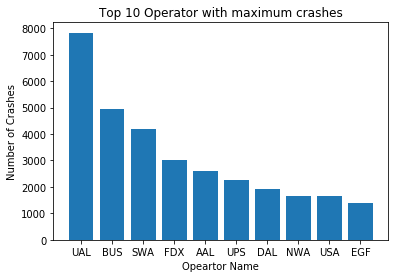

In [30]:
# Bar chart showing top 10 operator with maximum crashes
X = operatorMax['operator_id'].values[0:10]
y_pos = np.arange(len(X))
Y = operatorMax['count'].values[0:10]
plt.bar(y_pos, Y, align='center')
plt.xticks(y_pos, X)
plt.ylabel('Number of Crashes')
plt.xlabel('Opeartor Name')
plt.title('Top 10 Operator with maximum crashes')

### Type of Aircraft with maximum Crashes

In [31]:
#Grouping based on type of aircraft and counting number of crashes
aircraftTypeMax = pd.DataFrame({'count' : data[['aircraft_type']].groupby(['aircraft_type'])['aircraft_type'].count()}).reset_index()
# Sorting in descending order and removing unknown group
aircraftTypeMax = aircraftTypeMax.sort_values(by=['count'], ascending=False).iloc[1:]
aircraftTypeMax

,aircraft_type,count
38,B-737-300,4285
4,A-320,3265
49,B-757-200,3003
153,CL-RJ100/200,2686
3,A-319,2231
41,B-737-700,1918
34,B-727-200,1540
0,A-300,1371
204,EMB-145,1182
40,B-737-500,1150


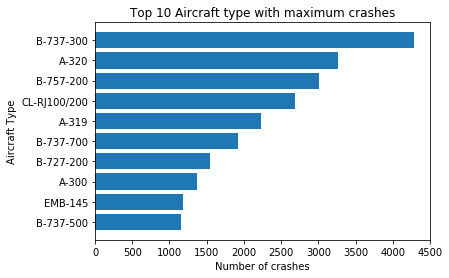

In [32]:
# Bar chart showing top 10 Aircraft type with maximum crashes
X = np.flip(aircraftTypeMax['aircraft_type'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(aircraftTypeMax['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Aircraft Type')
plt.xlabel('Number of crashes')
plt.title('Top 10 Aircraft type with maximum crashes')
plt.show()

### Finding maximum crashes based on operator and Aircraft type combined

In [33]:
#Grouping operator,operator ID and Aircraft Type and counting number of crashes
opr_aircraft_type_max = pd.DataFrame({'count' : data[['operator','operator_id','aircraft_type']].groupby(['operator','operator_id','aircraft_type'])['operator'].count()}).reset_index()
# Sorting in descending order and removing unknown group
opr_aircraft_type_max = opr_aircraft_type_max.sort_values(by=['count'], ascending=False).iloc[1:]
opr_aircraft_type_max

,operator,operator_id,aircraft_type,count
1518,SOUTHWEST AIRLINES,SWA,B-737-300,1823
1521,SOUTHWEST AIRLINES,SWA,B-737-700,1680
1599,UNITED AIRLINES,UAL,B-737-300,1642
1593,UNITED AIRLINES,UAL,A-320,1577
1607,UNITED AIRLINES,UAL,B-757-200,1137
1592,UNITED AIRLINES,UAL,A-319,876
1601,UNITED AIRLINES,UAL,B-737-500,846
869,FEDEX EXPRESS,FDX,B-727-200,819
1725,UPS AIRLINES,UPS,B-757-200,732
1715,UPS AIRLINES,UPS,A-300,726


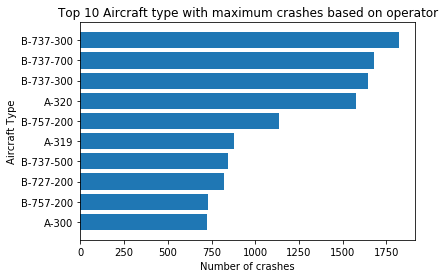

In [34]:
# Bar chart showing top 10 Aircraft type with maximum crashes
X = np.flip(opr_aircraft_type_max['aircraft_type'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(opr_aircraft_type_max['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Aircraft Type')
plt.xlabel('Number of crashes')
plt.title('Top 10 Aircraft type with maximum crashes based on operator')
plt.show()

### Scatter plot for Height Vs Speed

In [35]:
##Normalize the height and speed in the range 1-100
speed_array = normalize_data(data['speed'])
height_array = normalize_data(data['height_feet'])

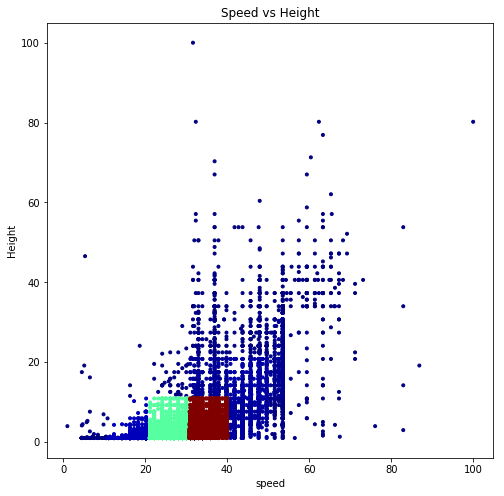

In [36]:
#x=  np.log10(speed_array.reshape(59971,))
#y=  np.log10(height_array.reshape(59971,))
x=  speed_array.reshape(59971,)
y=  height_array.reshape(59971,)
#histogram definition
bins = [10, 10] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]
plt.figure(1,figsize=(8,8)).clf()
plt.ylabel('Height')
plt.xlabel('speed')
plt.title('Speed vs Height')
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.')  

### Finding maximum crashes based on Phase of flight

In [37]:
#Grouping based on phase of flight and counting number of crashes
phase_flight_max = pd.DataFrame({'count' : data[['phase_of_flight']].groupby(['phase_of_flight'])['phase_of_flight'].count()}).reset_index()
# Sorting in descending order and removing unknown group
phase_flight_max = phase_flight_max.sort_values(by=['count'], ascending=False).iloc[1:]
phase_flight_max

,phase_of_flight,count
0,Approach,15950
6,Take-off run,7730
4,Landing Roll,7078
1,Climb,6897
2,Descent,1565
3,En Route,704
7,Taxi,152
5,Parked,19


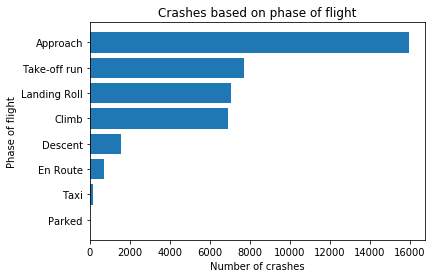

In [38]:
# Bar chart showing crashes based on phase on flight
X = np.flip(phase_flight_max['phase_of_flight'].values,axis=0)
y_pos = np.arange(len(X))
Y = np.flip(phase_flight_max['count'].values,axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Phase of flight')
plt.xlabel('Number of crashes')
plt.title('Crashes based on phase of flight')
plt.show()

### Finding number of crashes based on sky

In [39]:
#Grouping based on type of sky and counting number of crashes
sky_max = pd.DataFrame({'count' : data[['sky']].groupby(['sky'])['sky'].count()}).reset_index()
# Sorting in descending order and removing unknown group
sky_max = sky_max.sort_values(by=['count'], ascending=False).iloc[1:]
sky_max

,sky,count
0,No Cloud,15016
2,Some Cloud,10182
1,Overcast,5654


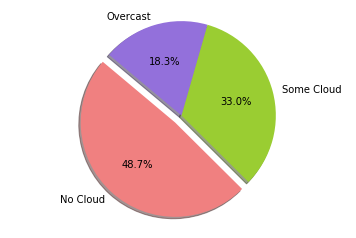

In [40]:
# Pie chart showing maximum crashes based on phase of flight
labels = sky_max['sky']
sizes = sky_max['count']
colors = ['lightcoral', 'yellowgreen', 'mediumpurple']
    
explode = [0] * len(labels)  # explode 1st slice
explode[0] =0.1
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Finding number of crashes based on precipitation

In [41]:
#Grouping based on type of sky and counting number of crashes
precip_max = pd.DataFrame({'count' : data[['precipitation']].groupby(['precipitation'])['precipitation'].count()}).reset_index()
# Sorting in descending order and removing unknown group
precip_max = precip_max.sort_values(by=['count'], ascending=False).iloc[1:]
precip_max

,precipitation,count
4,None,26666
5,Rain,1842
0,Fog,610
1,"Fog, Rain",124
7,Snow,124
6,"Rain, Snow",8
2,"Fog, Rain, Snow",4
3,"Fog, Snow",4


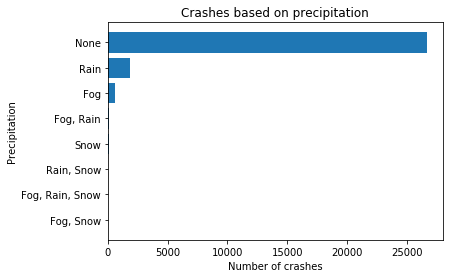

In [42]:
# Bar chart showing crashes based on precipitation
X = np.flip(precip_max['precipitation'].values,axis=0)
y_pos = np.arange(len(X))
Y = np.flip(precip_max['count'].values,axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Precipitation')
plt.xlabel('Number of crashes')
plt.title('Crashes based on precipitation')
plt.show()

### Finding number of crashes based on sky and precipitation combined

In [43]:
#Grouping sky,precipitation and counting number of crashes
sky_precip_max = pd.DataFrame({'count' : data[['sky','precipitation']].groupby(['sky','precipitation'])['sky'].count()}).reset_index()
# Sorting in descending order and removing unknown group
sky_precip_max = sky_precip_max.sort_values(by=['count'], ascending=False).iloc[:]
sky_precip_max = sky_precip_max[(sky_precip_max['sky']!= val_unknown) & (sky_precip_max['precipitation']!= val_unknown)]
sky_precip_max

,sky,precipitation,count
1,No Cloud,None,14595
16,Some Cloud,None,9125
9,Overcast,None,2946
10,Overcast,Rain,1531
5,Overcast,Fog,437
17,Some Cloud,Rain,303
6,Overcast,"Fog, Rain",121
14,Some Cloud,Fog,114
12,Overcast,Snow,108
0,No Cloud,Fog,59


### Finding maximum number of crashes based on airport,runway and phase of flight combined

In [44]:
#Grouping operator,operator ID and Aircraft Type and counting number of crashes
air_runway_pof_max = pd.DataFrame({'count' : data[['airport','runway','phase_of_flight']].groupby(['airport','runway','phase_of_flight'])['phase_of_flight'].count()}).reset_index()
# Sorting in descending order and removing unknown group
air_runway_pof_max = air_runway_pof_max.sort_values(by=['count'], ascending=False).iloc[2:]
air_runway_pof_max = air_runway_pof_max[(air_runway_pof_max['airport']!= val_unknown) & (air_runway_pof_max['runway']!= val_unknown) & (air_runway_pof_max['phase_of_flight']!= val_unknown)]
air_runway_pof_max.head(top)

,airport,runway,phase_of_flight,count
5156,KMEM,36R,Approach,185
5137,KMEM,27,Approach,150
5150,KMEM,36L,Approach,148
7733,KSMF,16R,Approach,145
7724,KSMF,16L,Approach,134
4604,KLGA,22,Approach,128
5852,KOAK,29,Approach,127
6423,KPHL,27R,Approach,125
2242,KDCA,1,Approach,121
7361,KSDF,35L,Approach,118


### Finding the number of crashes state wise

In [45]:
#Grouping based on type of aircraft and counting number of crashes
state_max = pd.DataFrame({'count' : data[['state']].groupby(['state'])['state'].count()}).reset_index()
# Sorting in descending order and removing unknown group
state_max = state_max.sort_values(by=['count'], ascending=False).iloc[1:]
state_max

,state,count
6,CA,4857
53,TX,4041
11,FL,3174
39,NY,3025
16,IL,2451
7,CO,2430
40,OH,2109
52,TN,1914
25,MI,1654
34,NJ,1631


Text(0.5, 1.0, 'Top 10 State with maximum crashes')

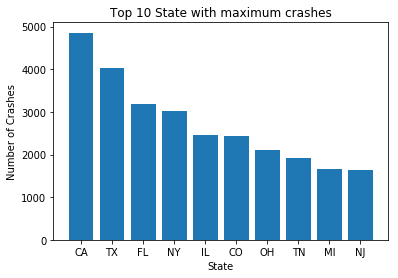

In [46]:
# Bar chart showing top 10 states with maximum crashes
X = state_max['state'].values[0:10]
y_pos = np.arange(len(X))
Y = state_max['count'].values[0:10]
plt.bar(y_pos, Y, align='center')
plt.xticks(y_pos, X)
plt.ylabel('Number of Crashes')
plt.xlabel('State')
plt.title('Top 10 State with maximum crashes')

### Finding maximum number of crashes state and city combined

In [47]:
#Grouping state,city and counting number of crashes
state_city_max = pd.DataFrame({'count' : data[['state','airport']].groupby(['state','airport'])['state'].count()}).reset_index()
# Sorting in descending order and removing unknown group
state_city_max = state_city_max.sort_values(by=['count'], ascending=False).iloc[1:]
state_city_max.head(top)

,state,airport,count
204,CO,KDEN,2090
1037,TX,KDFW,1529
1002,TN,KMEM,1316
392,IL,KORD,1305
803,NY,KJFK,1199
175,CA,KSMF,944
904,OR,KPDX,829
229,DC,KIAD,806
640,MO,KMCI,804
1260,UT,KSLC,790


### Finding maximum number of crashes year-wise

In [48]:
yearList = []
crashList = []
timestampList = list(data['date'])
#Extracting year from timestamp
for dates in timestampList:
    yearList.append(dates.year)
#Extracting unique years form the yearList
uniqueYears = list(np.unique(yearList))
#Counting the number of crashes using unique year list
for year in uniqueYears:
    crashList.append(yearList.count(year))

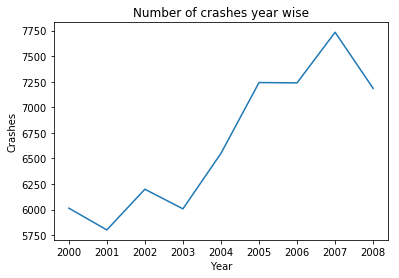

In [49]:
plt.plot(crashList)
plt.xticks(np.arange(len(crashList)), uniqueYears)
plt.ylabel('Crashes')
plt.xlabel('Year')
plt.title('Number of crashes year wise')
plt.show()

### Number of crashes based on size of bird

In [50]:
#Grouping based on type of size and counting number of crashes
size_max = pd.DataFrame({'count' : data[['size']].groupby(['size'])['size'].count()}).reset_index()
# Sorting in descending order and removing unknown group
size_max = size_max.sort_values(by=['count'], ascending=False).iloc[:]
size_max = size_max[(size_max['size']!= val_unknown)]
size_max

,size,count
2,Small,26865
1,Medium,10941
0,Large,3805


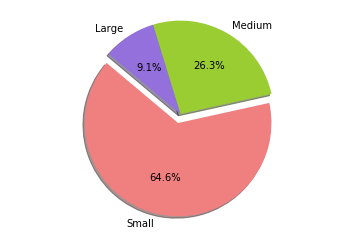

In [51]:
# Pie chart showing maximum crashes based on bird size
labels = size_max['size']
sizes = size_max['count']
colors = ['lightcoral', 'yellowgreen', 'mediumpurple']
    
explode = [0] * len(labels)  # explode 1st slice
explode[0] =0.1
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Number of crashes based on different bird species

In [52]:
#Grouping based on type of size and counting number of crashes
species_max = pd.DataFrame({'count' : data[['species']].groupby(['species'])['species'].count()}).reset_index()
# Sorting in descending order and removing unknown group
species_max = species_max.sort_values(by=['count'], ascending=False).iloc[3:]
species_max.head(top)

,species,count
260,MOURNING DOVE,2291
201,GULLS,2186
156,EUROPEAN STARLING,1427
9,AMERICAN KESTREL,1422
391,SPARROWS,1220
224,KILLDEER,1189
417,UNKNOWN BIRD - LARGE,1076
349,ROCK PIGEON,1045
214,HORNED LARK,832
28,BARN SWALLOW,753


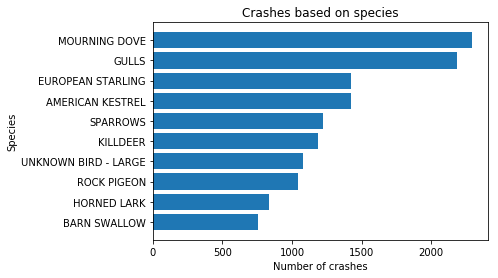

In [53]:
# Bar chart showing crashes based on species
X = np.flip(species_max['species'].values[0:10],axis=0)
y_pos = np.arange(len(X))
Y = np.flip(species_max['count'].values[0:10],axis=0)
plt.barh(y_pos, Y, align='center')
plt.yticks(y_pos, X)
plt.ylabel('Species')
plt.xlabel('Number of crashes')
plt.title('Crashes based on species')
plt.show()

### Number of Crashes based on species, size and state 

In [54]:
#Grouping species,size,state and counting number of crashes
species_size_st_max = pd.DataFrame({'count' : data[['state','species','size']].groupby(['state','species','size'])['size'].count()}).reset_index()
# Sorting in descending order and removing unknown group
species_size_st_max = species_size_st_max.sort_values(by=['count'], ascending=False)
species_size_st_max = species_size_st_max[(species_size_st_max['state']!= val_unknown) & (species_size_st_max['size']!= val_unknown)]
species_size_st_max = species_size_st_max[(species_size_st_max['species']!= 'UNKNOWN BIRD - SMALL') & (species_size_st_max['species']!= 'UNKNOWN BIRD - MEDIUM')]
species_size_st_max.head(top)

,state,species,size,count
615,CO,HORNED LARK,Small,314
4006,TX,MOURNING DOVE,Small,293
249,AZ,MOURNING DOVE,Small,256
1185,HI,PACIFIC GOLDEN-PLOVER,Small,253
3025,NY,HERRING GULL,Medium,235
3225,OH,MOURNING DOVE,Small,201
3016,NY,GULLS,Medium,188
415,CA,GULLS,Medium,175
1335,IL,AMERICAN KESTREL,Small,149
3941,TX,DOVES,Small,145


### Number of crashes based on state, sky and precipitation combined

In [55]:
#Grouping statet,sky,precipitation and counting number of crashes
state_sky_prep_max = pd.DataFrame({'count' : data[['state','sky','precipitation']].groupby(['state','sky','precipitation'])['state'].count()}).reset_index()
# Sorting in descending order and removing unknown group
state_sky_prep_max = state_sky_prep_max.sort_values(by=['count'], ascending=False)
state_sky_prep_max = state_sky_prep_max[(state_sky_prep_max['state']!= val_unknown) & (state_sky_prep_max['sky']!= val_unknown) & (state_sky_prep_max['precipitation']!= val_unknown)]
state_sky_prep_max.head(top)

,state,sky,precipitation,count
59,CA,No Cloud,None,1623
590,TX,No Cloud,None,1189
137,FL,Some Cloud,None,1077
128,FL,No Cloud,None,874
598,TX,Some Cloud,None,756
438,NY,No Cloud,None,663
575,TN,No Cloud,None,650
69,CA,Some Cloud,None,575
189,IL,No Cloud,None,520
321,MO,No Cloud,None,504


### Number of crashes based on bird seen or not

In [56]:
#Grouping based on bird seen and counting number of crashes
bird_seen_max = pd.DataFrame({'count' : data[['birds_seen']].groupby(['birds_seen'])['birds_seen'].count()}).reset_index()
# Sorting in descending order and removing unknown group
bird_seen_max = bird_seen_max.sort_values(by=['count'], ascending=False).iloc[:-1]
bird_seen_max

,birds_seen,count
0,0,38219
2,1-10,19430
3,11-100,2066
4,Over 100,252


Text(0.5, 1.0, 'Crashes based on bird seen')

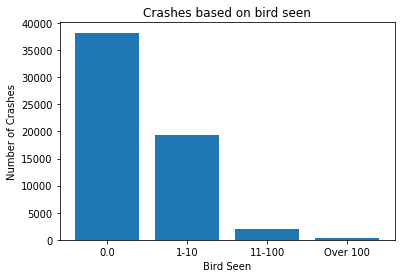

In [57]:
# Bar chart showing top 10 states with maximum crashes
X = bird_seen_max['birds_seen'].values
y_pos = np.arange(len(X))
Y = bird_seen_max['count'].values
plt.bar(y_pos, Y, align='center')
plt.xticks(y_pos, X)
plt.ylabel('Number of Crashes')
plt.xlabel('Bird Seen')
plt.title('Crashes based on bird seen')

### Analysing the relation between cost of repair and number of bird struck

In [58]:
#Grouping cost,bird_struck and counting number of crashes
cost_bird_struck_max = pd.DataFrame({'count' : data[['birds_struck','cost_of_repairs']].groupby(['birds_struck','cost_of_repairs'])['birds_struck'].count()}).reset_index()

cost_bird_struck_max = cost_bird_struck_max[(cost_bird_struck_max['birds_struck']!= val_unknown) & (cost_bird_struck_max['cost_of_repairs']!= val_unknown)]

# Sorting in descending order and removing unknown group
cost_bird_struck_max = cost_bird_struck_max.sort_values(by=['cost_of_repairs'], ascending=False)
cost_bird_struck_max.head(top)

,birds_struck,cost_of_repairs,count
604,1-10,9.5e+06,1
603,1-10,9.456e+06,1
602,1-10,8.92512e+06,1
601,1-10,8.2e+06,1
600,1-10,6.12808e+06,1
638,11-100,5e+06,1
599,1-10,5e+06,2
598,1-10,4.05423e+06,1
597,1-10,3.32091e+06,1
596,1-10,3.2e+06,2


## Important Observations

1) It can be observed that the United Airlines has suffered a maximum number of mishaps   
2) The aircraft type B-737-300 is more prone to crashes so a further analysis on the aircraft specifications as compared to other aircrafts can lead to  formal conclusion about the use of this aircraft.Moreover, the South West airlines suffered a maximum no.of crashes when using the same aircraft.  
3) No direct relation can be inferred on the effect of height and speed in the no. of crashes, but the data reveals that crashes have often occured at a moderate speed and moderate height.  
4) The maximum no. of crashes have occured when the flight is approaching the runway.  
5) The No. of crashes has increased overtime, this may be due to an increase in the air-traffic over the recent years  
6) No strong conclusions can be drawn on crashes from the state of the sky and precipitation.  
7) It also can be seen that maximum crashes have taken place due to small species of bird.



# Conclusion

From the above observations, it can be concluded various parameters like the speed, type of aircraft, height from the ground, species & size of birds, the phase of the flight are some of the important factors leading to the aircraft crashes.
Accordingly various steps are needed to be taken like    
1) Analysis on the specifications of some of the aircrafts.  
2) Extra precautions might be required during the Approach phase of the flight.   
3) Efficient technologies to sight the small bird species can be developed.  
4) Measures need to be formulated to deal with the increasing amount of air traffic.